In [1]:
import glob
import wfdb
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.patches as mpatches
import numpy as np
from read_data import ECGSample, ECGDataset
from ecgdetectors import Detectors



all_paths = glob.glob("D:/studying_2020/arythmia/mitdb/*.dat")
#first 23 sample starts with 100 are samples of more common arrythmias other
# 200 are more rare arrythmias


#dataset = ECGDataset()

# print(dataset.get_statistics_arryth())
# print(dataset.get_statistics_beat())



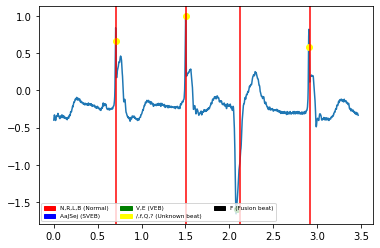

In [49]:
s = ECGSample(all_paths[2])


s.plot_record1(508163-750, 508163+500, True, arryth_show = False)

In [48]:
for i in range(len(s.beat)):
    if s.beat[i] == "V":
        print(i)
        break
s.inds[1715]

117


508163

In [ ]:
from scipy.signal import butter, lfilter
from copy import deepcopy

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs #Nyquist frequeny is half the sampling frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

filtered = butter_lowpass_filter(s.record1, 2.5, 50.0, 5)
filtered.shape

filt = deepcopy(s)
filt.record1 = filtered
r_peaks_filt = detectors.two_average_detector(filt.record1)
filt.plot_record1(1000, 2000,True, arryth_show = False, move = 10)


In [93]:
def compare_R(predicted, real):
    percent = len(predicted)/len(real)
    takeClosest = lambda num,collection:min(collection,key=lambda x:abs(x-num))
    sum_squares = 0
    for i in real:
        closest = takeClosest(i, predicted)
        sum_squares += (i-closest)**2
    return percent, sum_squares**(1/2)


In [67]:
def compare_on_dataset(dataset, detector):
    average_percent = 0
    
    objects = []
    ssr = []
    for s in dataset.raw_samples:
        r_peaks = detector(s.record1)
        res = compare_R(r_peaks, s.inds)
        average_percent += abs(1-res[0])
        
        objects.append(s.file)
        ssr.append(res[1]/1000000)
    
    average_percent = average_percent/len(dataset.raw_samples)
    total_ssr = 1000000*sum(ssr)
    
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, ssr, align='center', alpha=0.5)
    plt.xticks(y_pos, objects, rotation=90)
    plt.ylabel('sum of squares in sample')
    plt.title('Sum of squares in dataset ' + detector.__name__ +"   aver  % " + str(average_percent))

    plt.show()
    return [detector, total_ssr, average_percent]

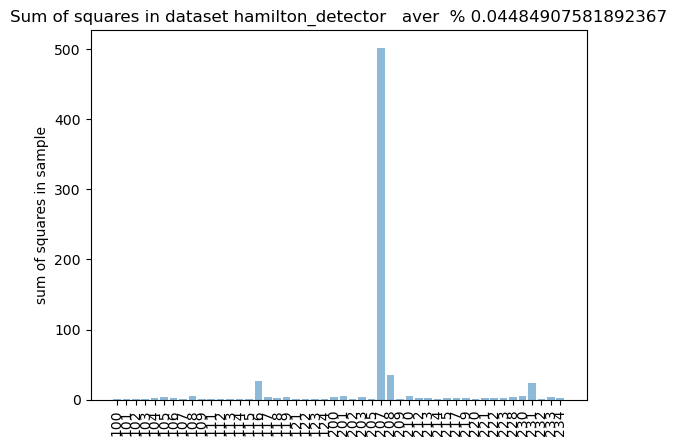

In [68]:
detectors = Detectors(dataset.raw_samples[0].record_detail['fs'])
ham = compare_on_dataset(dataset, detectors.hamilton_detector)

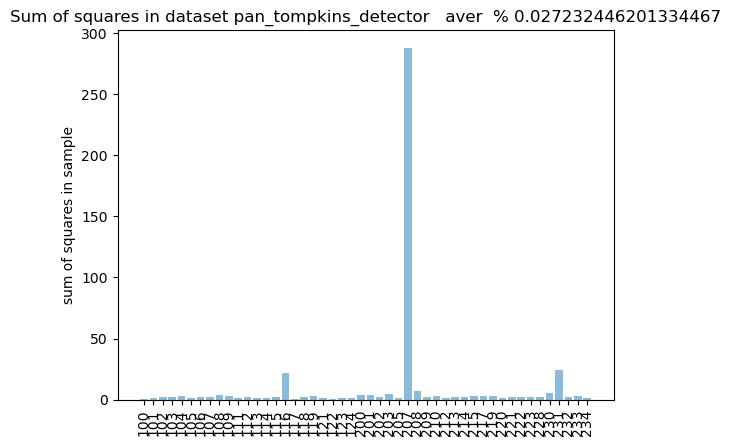

In [69]:
pan_t = compare_on_dataset(dataset, detectors.pan_tompkins_detector)

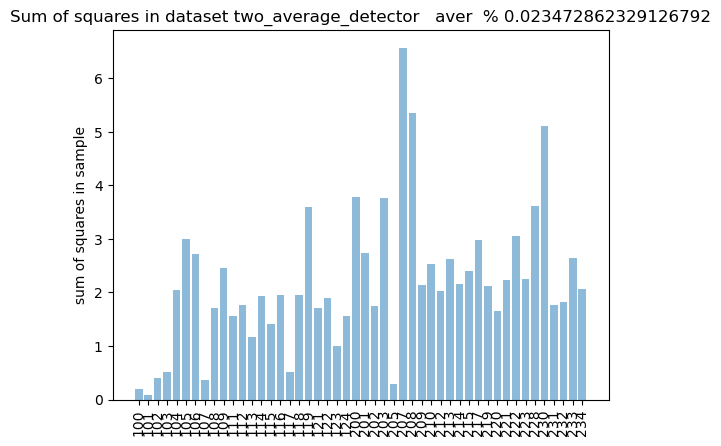

In [70]:
two_average = compare_on_dataset(dataset, detectors.two_average_detector)

In [71]:
pan_t
two_average
ham

[<bound method Detectors.hamilton_detector of <ecgdetectors.Detectors object at 0x000001460FF7BF08>>,
 684157709.0000002,
 0.04484907581892367]